In [4]:
!pip install -q torchinfo

In [1]:
!pip install -q monai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install -q timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 142.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [5]:
import os
import shutil
import tempfile
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import torch
import weakref
from torch.utils.tensorboard import SummaryWriter
import numpy as np
from sklearn.metrics import classification_report
from torch import nn
import torch.nn.functional as F

In [6]:
from monai.apps import download_and_extract
from monai.config import print_config
from monai.data import decollate_batch, DataLoader, create_test_image_3d
from monai.metrics import ROCAUCMetric
from monai.networks.nets import DenseNet121, ResNet
from monai.transforms import (
    Activations,
    EnsureChannelFirst,
    AsDiscrete,
    Compose,
    LoadImage,
    RandFlip,
    RandRotate,
    RandZoom,
    ScaleIntensity,
)
from monai.utils import set_determinism

print_config()

MONAI version: 1.5.0
Numpy version: 2.0.2
Pytorch version: 2.8.0+cu128
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: d388d1c6fec8cb3a0eebee5b5a0b9776ca59ca83
MONAI __file__: /usr/local/lib/python3.12/dist-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.3.2
scikit-image version: 0.25.2
scipy version: 1.16.1
Pillow version: 11.3.0
Tensorboard version: 2.19.0
gdown version: 5.2.0
TorchVision version: 0.23.0+cu126
tqdm version: 4.67.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.5
pandas version: 2.2.2
einops version: 0.8.1
transformers version: 4.56.1
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/la

In [7]:
from torchinfo import summary

In [190]:
from transformers import UperNetForSemanticSegmentation, AutoImageProcessor

model = UperNetForSemanticSegmentation.from_pretrained(
    "openmmlab/upernet-swin-base"
)

processor = AutoImageProcessor.from_pretrained("openmmlab/upernet-swin-base")

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

In [176]:
summary(model, input_size=(8, 3, 512, 512))  # (B,C,H,W)

Layer (type:depth-idx)                                            Output Shape              Param #
UperNetForSemanticSegmentation                                    [8, 150, 512, 512]        --
├─SwinBackbone: 1-1                                               [8, 128, 128, 128]        --
│    └─SwinEmbeddings: 2-1                                        [8, 16384, 128]           --
│    │    └─SwinPatchEmbeddings: 3-1                              [8, 16384, 128]           6,272
│    │    └─LayerNorm: 3-2                                        [8, 16384, 128]           256
│    │    └─Dropout: 3-3                                          [8, 16384, 128]           --
│    └─SwinEncoder: 2-2                                           [8, 128, 128, 128]        --
│    │    └─ModuleList: 3-4                                       --                        86,870,008
│    └─ModuleDict: 2-3                                            --                        --
│    │    └─LayerNorm: 3-5       

In [191]:
num_classes = 2

# Replace the final classifier
model.decode_head.classifier = nn.Conv2d(
    in_channels=model.decode_head.classifier.in_channels,
    out_channels=num_classes,
    kernel_size=1
)

#summary(model, input_size=(8, 3, 224, 224))

# REMEMBER: UperNetHead is the actual head, UperNetFCNHead is used only during training
# to check whether compression is working

In [224]:
import types
import torch.nn.functional as F
from transformers.modeling_outputs import SemanticSegmenterOutput


def new_forward(self, pixel_values=None, output_hidden_states=None, return_dict=True, **kwargs):
    # get input shape
    input_shape = pixel_values.shape if pixel_values is not None else None
    # run backbone + head
    outputs = self.backbone(pixel_values)
    feats = outputs.feature_maps

    logits = self.decode_head(feats)


    # fix interpolation: only use H, W
    if input_shape is not None:
        h, w = input_shape[-2:]
        logits = F.interpolate(logits, size=(h, w),
                               mode="bilinear", align_corners=False)
    return SemanticSegmenterOutput(logits=logits)

model.forward = types.MethodType(new_forward, model)


In [209]:
img3d, mask3d = create_test_image_3d(64, 64, 64, num_seg_classes=2, channel_dim=0)

img3d = torch.tensor(img3d)   # [1, 64, 64, 64]
mask3d = torch.tensor(mask3d)

slice_idx = 32
img2d = img3d[0, slice_idx].unsqueeze(-1).repeat(1, 1, 3).numpy()  # duplicates the last dimension 3 times -> fake RGB
# because UPerNet expects a 3-channel RGB input

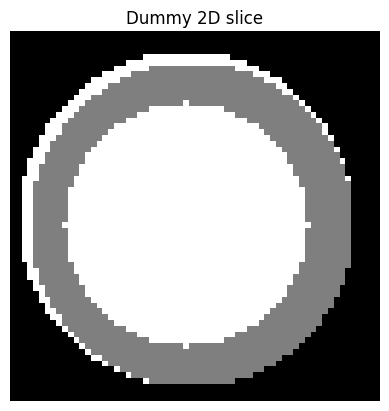

In [194]:
plt.imshow(img2d.astype("float32"), cmap="gray")  # or just plt.imshow(img2d) since it's RGB
plt.title("Dummy 2D slice")
plt.axis("off")
plt.show()

In [195]:
mask2d = mask3d[0, slice_idx].unsqueeze(-1).repeat(1, 1, 3).numpy()

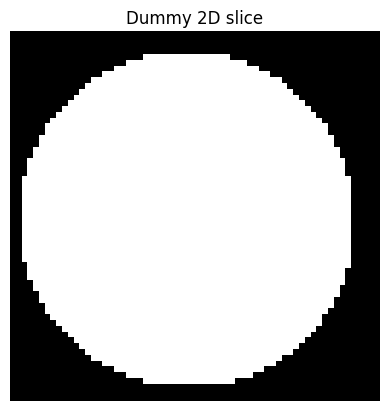

In [196]:
plt.imshow(mask2d.astype("float32"), cmap="gray")
plt.title("Dummy 2D slice")
plt.axis("off")
plt.show()

In [215]:
# pre-process into the tensor-shape and normalization that the model expects
inputs = processor(images=img2d, return_tensors="pt")

In [211]:
inputs['pixel_values'].shape

torch.Size([1, 3, 512, 512])

In [216]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inputs.to(device);

In [225]:
model.to(device)  # moves all params/buffers

with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits  # [1, num_classes, H', W']

SemanticSegmenterOutput(loss=None, logits=tensor([[[[0.3494, 0.3494, 0.3482,  ..., 0.3685, 0.3779, 0.3779],
          [0.3494, 0.3494, 0.3482,  ..., 0.3685, 0.3779, 0.3779],
          [0.3629, 0.3629, 0.3611,  ..., 0.3809, 0.3904, 0.3904],
          ...,
          [0.4031, 0.4031, 0.3946,  ..., 0.4262, 0.4386, 0.4386],
          [0.4018, 0.4018, 0.3945,  ..., 0.4429, 0.4548, 0.4548],
          [0.4018, 0.4018, 0.3945,  ..., 0.4429, 0.4548, 0.4548]],

         [[0.7491, 0.7491, 0.7252,  ..., 0.9384, 0.9842, 0.9842],
          [0.7491, 0.7491, 0.7252,  ..., 0.9384, 0.9842, 0.9842],
          [0.7263, 0.7263, 0.7001,  ..., 0.8902, 0.9340, 0.9340],
          ...,
          [0.7977, 0.7977, 0.7643,  ..., 0.7180, 0.7467, 0.7467],
          [0.8313, 0.8313, 0.7955,  ..., 0.7483, 0.7778, 0.7778],
          [0.8313, 0.8313, 0.7955,  ..., 0.7483, 0.7778, 0.7778]]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [226]:
# 6. Resize back to original size
seg = processor.post_process_semantic_segmentation(outputs, target_sizes=[img2d.shape[:2]])
seg = seg[0].cpu().numpy()

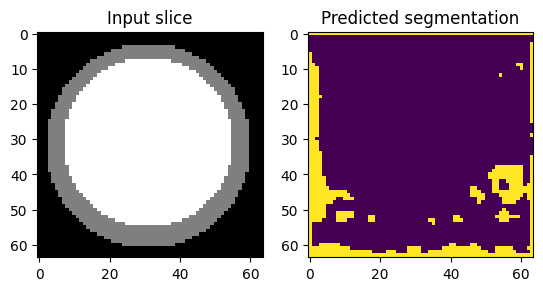

In [227]:
# 7. Visualize
plt.subplot(1,2,1)
plt.imshow(img2d); plt.title("Input slice")
plt.subplot(1,2,2)
plt.imshow(seg, cmap="viridis"); plt.title("Predicted segmentation")
plt.show()

In [228]:
# Access backbone
backbone = model.backbone  # this is SwinModel

# Access patch embedding
print(backbone.embeddings)

SwinEmbeddings(
  (patch_embeddings): SwinPatchEmbeddings(
    (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
  )
  (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (dropout): Dropout(p=0.0, inplace=False)
)


In [229]:
conv2d = backbone.embeddings.patch_embeddings.projection
W2d = conv2d.weight.data
b2d = conv2d.bias.data

In [230]:
type(inputs)

transformers.image_processing_base.BatchFeature

In [231]:
def preprocess_3d_volume(volume, depth_size=5, stride=1, mean=None, std=None):
    """
    volume: torch.Tensor [C,D,H,W] or [D,H,W] if single-channel
    depth_size: number of slices per window
    stride: step along depth
    """
    if volume.ndim == 3:
        volume = volume.unsqueeze(0)  # [1,D,H,W]

    C, D, H, W = volume.shape
    windows = []
    for start in range(0, D - depth_size + 1, stride):
        clip = volume[:, start:start+depth_size, :, :]  # [C, depth_size, H, W]

        # normalize like processor (ImageNet mean/std per channel)
        if mean is not None and std is not None:
            for c in range(C):
                clip[c] = (clip[c] - mean[c]) / std[c]

        windows.append(clip)

    # [num_windows, C, depth_size, H, W]
    return torch.stack(windows)


In [232]:
vol = torch.randn(1, 20, 224, 224)  # [C=1, D=20, H,W]
windows = preprocess_3d_volume(vol, depth_size=5, stride=5)
print(windows.shape)  # [num_windows, 1, 5, 224, 224]
# non-overlapping windows due to stride = depth_size

torch.Size([4, 1, 5, 224, 224])


In [233]:
class Conv3dPatchEmbed(nn.Module):
    def __init__(self, in_chans=1, embed_dim=128,
                 kernel_size=(5,4,4), stride=(5,4,4), pretrained_weights = None, pretrained_bias = None):
        super().__init__()
        self.proj = nn.Conv3d(in_chans, embed_dim,
                              kernel_size=kernel_size,
                              stride=stride)
        # todo: add check for the dimensionality to match between pretrained_weights and these
        nn.init.zeros_(self.proj.weight)
        middle_layer = kernel_size[0] // 2
        self.proj.weight.data[:, 0, middle_layer, :, :] = pretrained_weights[:, 0, :, :] + pretrained_weights[:, 1, :, :] + pretrained_weights[:, 2, :, :]

        self.proj.bias.data = pretrained_bias.clone()


    def forward(self, x):                     # x: [B,C,D,H,W]
        x = self.proj(x)                      # [B,embed_dim,D',H',W']
        # IMPORTANT: UPerNet/Swin is 2D downstream. Ensure D'==1, then squeeze.
        if x.shape[2] != 1:
            raise ValueError(f"Depth after Conv3d must be 1 to squeeze, got {x.shape[2]}. "
                             "Fix kernel/stride/padding or handle 3D downstream.")
        x = x[:, :, 0, :, :]                  # [B,embed_dim,H',W']
        return x

In [234]:
def make_patch_embeddings_3d(embeddings: nn.Module, conv3d_embedder: nn.Module):
    # Create a weak reference (non-owning) to the parent embeddings object
    # This avoids circular references and ensures `embeddings` is not kept alive
    parent_ref = weakref.proxy(embeddings)

    # Access the original patch embedding layer from the parent (e.g., SwinEmbeddings.patch_embeddings)
    base = embeddings.patch_embeddings

    # Extract the patch_size attribute if it exists, otherwise default to (4,4)
    # Note: only primitives like tuples/ints are copied, not layers
    patch_size = getattr(base, "patch_size", (4,4))

    # Define a nested class to replace the original patch embedding with a 3D version
    class PatchEmbeddings3D(nn.Module):
        def __init__(self):
            super().__init__()
            # Register the custom 3D convolutional embedder (the actual learnable child module)
            self.conv3d = conv3d_embedder

            # Keep track of patch size as a primitive attribute (safe to copy)
            self.patch_size = patch_size

        def forward(self, pixel_values_5d: torch.Tensor):
            # Enforce 5D input: [Batch, Channels, Depth, Height, Width]
            if pixel_values_5d.ndim != 5:
                raise ValueError(f"Expected [B,C,D,H,W], got {tuple(pixel_values_5d.shape)}")

            # Apply the 3D convolution to produce embeddings
            # Output shape will be [B, C, H', W'] (depth collapsed by conv stride/kernel)
            x = self.conv3d(pixel_values_5d)
            B, C, H, W = x.shape

            # If the parent embeddings module has a normalization layer, apply it
            # Hugging Face convention: flatten spatial dims, apply LN(C), then reshape
            if getattr(parent_ref, "norm", None) is not None:
                x_flat = x.flatten(2).transpose(1, 2)   # [B, H'*W', C]
                x_flat = parent_ref.norm(x_flat)        # apply LayerNorm on channel dim
                # Optionally could reshape back to [B, C, H', W'], but here kept flattened
                x = x_flat

            # Return embeddings and the resulting spatial resolution (H', W')
            return x, (H, W)

    # Instantiate and return the new PatchEmbeddings3D module
    return PatchEmbeddings3D()


In [235]:
conv3d_embed = Conv3dPatchEmbed(
    in_chans=1,
    embed_dim=128,         # must match Swin config
    kernel_size=(5,4,4),
    stride=(5,4,4),
    pretrained_weights=W2d,
    pretrained_bias=b2d
)

In [236]:
# Replace the entire patch_embeddings module with the 3D-aware wrapper
model.backbone.embeddings.patch_embeddings = make_patch_embeddings_3d(
    model.backbone.embeddings,
    conv3d_embed
)

In [237]:
model.backbone.embeddings

SwinEmbeddings(
  (patch_embeddings): PatchEmbeddings3D(
    (conv3d): Conv3dPatchEmbed(
      (proj): Conv3d(1, 128, kernel_size=(5, 4, 4), stride=(5, 4, 4))
    )
  )
  (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (dropout): Dropout(p=0.0, inplace=False)
)

In [238]:
# 4) Test
x = torch.randn(2, 1, 5, 224, 224).to(device)  # [B,C,D,H,W]; D=5 fits kernel=(5,...) with stride=(5,...)
model.to(device)
tokens, (H, W) = model.backbone.embeddings.patch_embeddings(x)
print(tokens.shape, (H, W))
# Expected: tokens -> [B, embed_dim, H', W'], (H', W') consistent with stride

torch.Size([2, 3136, 128]) (56, 56)


In [239]:
model.backbone.embeddings.patch_embeddings.conv3d.proj.weight[0]

tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000]],

         [[ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000]],

         [[ 0.0010,  0.0752, -0.1624, -0.2067],
          [ 0.0497,  0.2111,  0.0617,  0.1348],
          [-0.0512, -0.0140,  0.0711,  0.0239],
          [-0.1518, -0.0956, -0.0805,  0.0813]],

         [[ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000]],

         [[ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000]]]], device='cuda:0',
       grad_

In [240]:
x = torch.randn(2, 1, 5, 224, 224).to(device)  # [B,C,D,H,W]
tokens, (H, W) = model.backbone.embeddings.patch_embeddings(x)
normalized_tokens = model.backbone.embeddings.norm(tokens)
dropout_tokens = model.backbone.embeddings.dropout(normalized_tokens)

In [241]:
class SwinEmbeddings3D(nn.Module):
    def __init__(self, patch_embeddings3d, embed_dim, p_drop=0.0):
        super().__init__()
        self.patch_embeddings = patch_embeddings3d     # your Conv3dPatchEmbed
        self.norm = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(p_drop)

    def forward(self, x):                              # x: [B,C,D,H,W]
        if x.ndim != 5:
            raise ValueError(f"Expected 5D, got {x.shape}")
        tokens, (H, W) = self.patch_embeddings(x)   # tokens: [B, N, C], N=D*H*W
        tokens = self.norm(tokens)
        tokens = self.dropout(tokens)
        return tokens, (H, W)

emb3d = SwinEmbeddings3D(
    patch_embeddings3d=model.backbone.embeddings.patch_embeddings,  # your Conv3d block
    embed_dim=128,
    p_drop=0.0,
)
model.backbone.embeddings = emb3d

In [242]:
model.backbone.embeddings

SwinEmbeddings3D(
  (patch_embeddings): PatchEmbeddings3D(
    (conv3d): Conv3dPatchEmbed(
      (proj): Conv3d(1, 128, kernel_size=(5, 4, 4), stride=(5, 4, 4))
    )
  )
  (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (dropout): Dropout(p=0.0, inplace=False)
)

In [243]:
x = torch.randn(2, 1, 5, 224, 224).to(device)  # [B,C,D,H,W]
model.to(device)
embedded = model.backbone.embeddings(x) # where embedded[0] is the actual embeddings, embedded[1] is (#patches_x, #patches_y)

In [244]:
embedded[0].shape, embedded[1]

(torch.Size([2, 3136, 128]), (56, 56))

In [245]:
x = torch.randn(1, 1, 5, 512, 512).to(device)  # [B,C,D,H,W]
tokens, (H, W) = model.backbone.embeddings(x)  # embedding returns both

In [246]:
tokens.shape

torch.Size([1, 16384, 128])

In [44]:
print(tokens.shape, H , W)

torch.Size([1, 16384, 128]) 128 128


In [247]:
encoded = model.backbone.encoder(tokens, (H, W))

In [248]:
bb_out = model.backbone(pixel_values=x)     # ← correct entry point
feats = bb_out.feature_maps

In [47]:
len(feats)

4

In [249]:
model.decode_head

UperNetHead(
  (classifier): Conv2d(512, 2, kernel_size=(1, 1), stride=(1, 1))
  (psp_modules): UperNetPyramidPoolingModule(
    (0): UperNetPyramidPoolingBlock(
      (0): AdaptiveAvgPool2d(output_size=1)
      (1): UperNetConvModule(
        (conv): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (batch_norm): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
    )
    (1): UperNetPyramidPoolingBlock(
      (0): AdaptiveAvgPool2d(output_size=2)
      (1): UperNetConvModule(
        (conv): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (batch_norm): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
    )
    (2): UperNetPyramidPoolingBlock(
      (0): AdaptiveAvgPool2d(output_size=3)
      (1): UperNetConvModule(
        (conv): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
       

In [250]:
logits = model.decode_head(feats)
print(logits.shape)
logits = F.interpolate(logits, size=x.shape[-2:], mode="bilinear", align_corners=False)
print(logits.shape)

torch.Size([1, 2, 128, 128])
torch.Size([1, 2, 512, 512])


In [251]:
model.auxiliary_head

UperNetFCNHead(
  (convs): Sequential(
    (0): UperNetConvModule(
      (conv): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU()
    )
  )
  (classifier): Conv2d(256, 150, kernel_size=(1, 1), stride=(1, 1))
)

In [252]:
logits_aux = model.auxiliary_head(feats)

In [253]:
logits_aux.shape

torch.Size([1, 150, 32, 32])

In [60]:
import os
os.environ["MONAI_DATA_DIRECTORY"] = "./2d_dataset"
directory = os.environ.get("MONAI_DATA_DIRECTORY")
if directory is not None:
    os.makedirs(directory, exist_ok=True)
root_dir = tempfile.mkdtemp() if directory is None else directory
resource = "https://github.com/Project-MONAI/MONAI-extra-test-data/releases/download/0.8.1/MedNIST.tar.gz"
md5 = "0bc7306e7427e00ad1c5526a6677552d"

compressed_file = os.path.join(root_dir, "MedNIST.tar.gz")
data_dir = os.path.join(root_dir, "MedNIST")
if not os.path.exists(data_dir):
    download_and_extract(resource, compressed_file, root_dir, md5)

MedNIST.tar.gz: 59.0MB [00:00, 79.3MB/s]                            

2025-09-19 11:52:05,896 - INFO - Downloaded: 2d_dataset/MedNIST.tar.gz


2025-09-19 11:52:06,015 - INFO - Verified 'MedNIST.tar.gz', md5: 0bc7306e7427e00ad1c5526a6677552d.
2025-09-19 11:52:06,015 - INFO - Writing into directory: ./2d_dataset.


In [254]:
set_determinism(seed = 0)

In [255]:
class_names = sorted(x for x in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, x)))
num_class = len(class_names)
image_files = [
    [os.path.join(data_dir, class_names[i], x) for x in os.listdir(os.path.join(data_dir, class_names[i]))]
    for i in range(num_class)
]
num_each = [len(image_files[i]) for i in range(num_class)]
image_files_list = []
image_class = []
for i in range(num_class):
    image_files_list.extend(image_files[i])
    image_class.extend([i] * num_each[i])
num_total = len(image_class)
image_width, image_height = PIL.Image.open(image_files_list[0]).size

print(f"Total image count: {num_total}")
print(f"Image dimensions: {image_width} x {image_height}")
print(f"Label names: {class_names}")
print(f"Label counts: {num_each}")

Total image count: 58954
Image dimensions: 64 x 64
Label names: ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
Label counts: [10000, 8954, 10000, 10000, 10000, 10000]


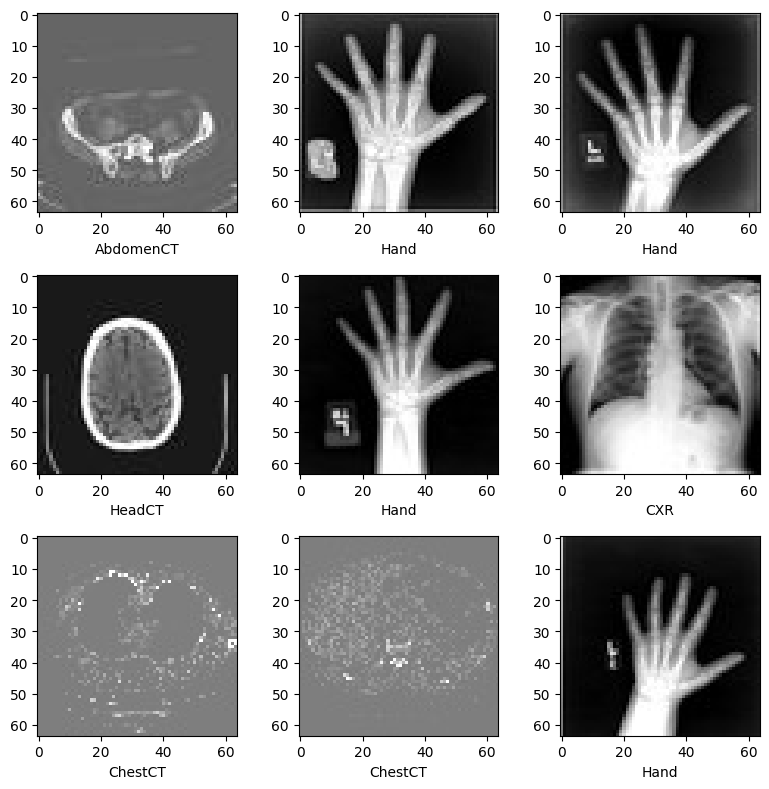

In [256]:
plt.subplots(3, 3, figsize=(8, 8))
for i, k in enumerate(np.random.randint(num_total, size=9)):
    im = PIL.Image.open(image_files_list[k])
    arr = np.array(im)
    plt.subplot(3, 3, i + 1)
    plt.xlabel(class_names[image_class[k]])
    plt.imshow(arr, cmap="gray", vmin=0, vmax=255)
plt.tight_layout()
plt.show()

In [257]:
len(image_files_list)

58954

In [293]:
reduced_list = image_files_list[:5]
reduced_class = image_class[:5]

In [294]:
tensors = []
for path in reduced_list:
    img = Image.open(path).convert("L")          # or "RGB" depending on data
    arr = np.array(img, dtype=np.float32) / 255.0  # normalize to [0,1]
    t = torch.from_numpy(arr).unsqueeze(0)       # [1,H,W]
    t = t.repeat(3,1,1)                          # [3,H,W]
    tensors.append(t)

# stack into batch
reduced_list = torch.stack(tensors)  # [B,3,H,W]


In [276]:
reduced_list.shape

torch.Size([5, 3, 64, 64])

In [280]:
class MedNISTDataset(torch.utils.data.Dataset):
    def __init__(self, image_files, labels):
        self.image_files = image_files
        self.labels = labels

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, index):
        return self.image_files[index], self.labels[index]


inference_ds = MedNISTDataset(reduced_list, reduced_class)
inference_loader = DataLoader(inference_ds, batch_size=300, shuffle=True, num_workers=10)

Il processo completo non funziona perchè, anche se non appare nella struttura, viene fatta un'interpolazione come ultimissimo passaggio per ritornare alla dimensionalità iniziale. Il problema è che se l'input sono 5 slice, e io ne predico una, allora sarà impossibile tornare in 3D

In [281]:
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for test_data in inference_loader:
        # test_data[0] = images
        # test_data[1] = classes
        images = test_data[0].to(device)
        images = images.unsqueeze(1)
        print(images.shape)
        pred = model(images)


torch.Size([3, 1, 5, 64, 64])


In [296]:
inputs = processor(images = reduced_list, return_tensors='pt').to(device)

In [298]:
inputs['pixel_values'].shape

torch.Size([5, 3, 512, 512])

In [299]:
inputs['pixel_values'] = inputs['pixel_values'][:, 0, :, :].unsqueeze(1).permute(1,0,2,3)

In [300]:
inputs['pixel_values'].shape

torch.Size([1, 5, 512, 512])

In [302]:
inputs['pixel_values'] = inputs['pixel_values'].unsqueeze(1)

In [303]:
inputs['pixel_values'].shape

torch.Size([1, 1, 5, 512, 512])

In [120]:
#1, 1, 5, 512, 512

In [305]:
bb_out = model.backbone(pixel_values=inputs['pixel_values'])     # ← correct entry point
feats = bb_out.feature_maps

In [306]:
logits = model.decode_head(feats)
logits = F.interpolate(logits, size=x.shape[-2:], mode="bilinear", align_corners=False)

In [307]:
logits.cpu()

tensor([[[[0.3675, 0.3675, 0.3781,  ..., 0.4746, 0.4791, 0.4791],
          [0.3675, 0.3675, 0.3781,  ..., 0.4746, 0.4791, 0.4791],
          [0.3776, 0.3776, 0.3877,  ..., 0.4899, 0.4949, 0.4949],
          ...,
          [0.4271, 0.4271, 0.4233,  ..., 0.5083, 0.5188, 0.5188],
          [0.4259, 0.4259, 0.4229,  ..., 0.5106, 0.5195, 0.5195],
          [0.4259, 0.4259, 0.4229,  ..., 0.5106, 0.5195, 0.5195]],

         [[0.6137, 0.6137, 0.5958,  ..., 1.0623, 1.1045, 1.1045],
          [0.6137, 0.6137, 0.5958,  ..., 1.0623, 1.1045, 1.1045],
          [0.5812, 0.5812, 0.5630,  ..., 1.0155, 1.0568, 1.0568],
          ...,
          [0.8240, 0.8240, 0.7818,  ..., 0.8079, 0.8394, 0.8394],
          [0.8587, 0.8587, 0.8141,  ..., 0.8373, 0.8692, 0.8692],
          [0.8587, 0.8587, 0.8141,  ..., 0.8373, 0.8692, 0.8692]]]],
       grad_fn=<ToCopyBackward0>)

In [308]:
logits[0].shape

torch.Size([2, 512, 512])

In [310]:
logits[0].cpu();

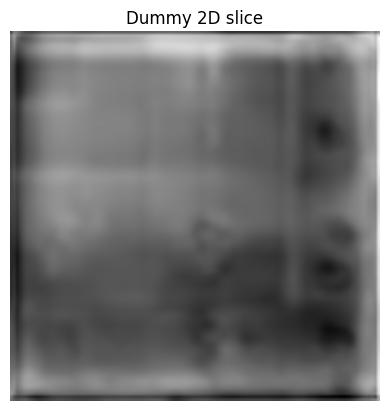

In [311]:
plt.imshow(np.array(logits[0, 0, :, :].detach().cpu()), cmap="gray")
plt.title("Dummy 2D slice")
plt.axis("off")
plt.show()

### Normalization

In [316]:
"""
Windowed 3D preprocessing exactly like the paper:
- Build K-slice windows (e.g., K=5) along depth
- Apply ONE set of spatial augments jointly to all K slices
- CT normalization: clip [-175,250] -> scale to [-1,1]
- Return tensors shaped [B, 1, K, 512, 512] (B handled by DataLoader)
- Target is the CENTER slice mask only
"""

from typing import List, Tuple, Optional
import numpy as np
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms.functional as TF
import random

# -----------------------
# Utility: normalization
# -----------------------
def normalize_ct_window(x: torch.Tensor, clip_min=-175.0, clip_max=250.0) -> torch.Tensor:
    """
    x: float tensor [K,H,W] (values in HU)
    -> clip to [clip_min, clip_max], map to [-1,1]
    """
    x = x.clamp_(clip_min, clip_max)
    x = (x - clip_min) / (clip_max - clip_min)  # [0,1]
    x = x * 2.0 - 1.0                           # [-1,1]
    return x

def normalize_mri_window(x: torch.Tensor) -> torch.Tensor:
    """
    x: float tensor [K,H,W] (non-negative)
    -> map [0, max] to [-1,1]
    """
    maxval = x.max().clamp(min=1e-6)
    x = x / maxval * 2.0 - 1.0
    return x

# -----------------------
# Utility: spatial ops (shared params for all K slices + center mask)
# -----------------------
def random_zoom_crop_pad(
    imgK: torch.Tensor,         # [K,H,W], float
    msk: Optional[torch.Tensor],# [H,W], long (center slice) or None
    out_hw=(512, 512),
    zoom_range=(0.5, 2.0),
    p_apply=1.0,
    rng: Optional[random.Random] = None,
):
    """
    - Sample zoom z in [0.5,2.0]
    - Resize to (round(H*z), round(W*z))
    - If larger than out_hw -> random crop to out_hw
      If smaller -> pad to out_hw (zeros for image, 0 for mask)
    Returns imgK', msk'
    """
    if rng is None:
        rng = random

    H, W = imgK.shape[-2:]
    if rng.random() > p_apply:
        # Only resize to out size (deterministic path)
        imgK = TF.resize(imgK, out_hw, interpolation=TF.InterpolationMode.BILINEAR, antialias=True)
        if msk is not None:
            msk = TF.resize(msk.unsqueeze(0).float(), out_hw, interpolation=TF.InterpolationMode.NEAREST).squeeze(0).long()
        return imgK, msk

    z = rng.uniform(*zoom_range)
    newH, newW = max(1, int(round(H * z))), max(1, int(round(W * z)))
    # Resize images (bilinear) and mask (nearest)
    imgK = TF.resize(imgK, (newH, newW), interpolation=TF.InterpolationMode.BILINEAR, antialias=True)
    if msk is not None:
        msk = TF.resize(msk.unsqueeze(0).float(), (newH, newW), interpolation=TF.InterpolationMode.NEAREST).squeeze(0).long()

    outH, outW = out_hw
    if newH >= outH and newW >= outW:
        # Random crop
        i = rng.randint(0, newH - outH)
        j = rng.randint(0, newW - outW)
        imgK = imgK[:, i:i+outH, j:j+outW]
        if msk is not None:
            msk = msk[i:i+outH, j:j+outW]
    else:
        # Pad to out size
        pad_top = (outH - newH) // 2 if newH < outH else 0
        pad_bottom = outH - newH - pad_top if newH < outH else 0
        pad_left = (outW - newW) // 2 if newW < outW else 0
        pad_right = outW - newW - pad_left if newW < outW else 0
        # Pad order for F.pad is (left, right, top, bottom)
        imgK = F.pad(imgK, (pad_left, pad_right, pad_top, pad_bottom), mode="constant", value=0.0)
        if msk is not None:
            msk = F.pad(msk, (pad_left, pad_right, pad_top, pad_bottom), mode="constant", value=0)

    return imgK, msk

def random_flip_rotate(
    imgK: torch.Tensor,          # [K,H,W]
    msk: Optional[torch.Tensor], # [H,W]
    p_flip=0.1,
    p_rot=0.1,
    max_degrees=10.0,
    rng: Optional[random.Random] = None,
):
    if rng is None:
        rng = random

    # Horizontal flip
    if rng.random() < p_flip:
        imgK = TF.hflip(imgK)
        if msk is not None:
            msk = TF.hflip(msk)

    # Vertical flip
    if rng.random() < p_flip:
        imgK = TF.vflip(imgK)
        if msk is not None:
            msk = TF.vflip(msk)

    # Small rotation
    if rng.random() < p_rot:
        angle = rng.uniform(-max_degrees, max_degrees)
        imgK = TF.rotate(imgK, angle=angle, interpolation=TF.InterpolationMode.BILINEAR, fill=0.0)
        if msk is not None:
            msk = TF.rotate(msk, angle=angle, interpolation=TF.InterpolationMode.NEAREST, fill=0)

    return imgK, msk

def random_intensity_shift(
    imgK: torch.Tensor,  # [K,H,W], in [-1,1]
    p=0.5,
    magnitude=0.1,
    rng: Optional[random.Random] = None,
):
    if rng is None:
        rng = random
    if rng.random() < p:
        delta = rng.uniform(-magnitude, magnitude)
        imgK = (imgK + delta).clamp_(-1.0, 1.0)
    return imgK

# -----------------------
# Dataset
# -----------------------
class Windowed3DSegDataset(Dataset):
    """
    volumes[i] : numpy array [D,H,W], floats (CT HU or MRI intensity)
    masks[i]   : numpy array [D,H,W], ints in {0..C-1} (center-slice target)
    Returns:
      image: torch.FloatTensor [1, K, 512, 512]
      mask:  torch.LongTensor  [512, 512]  (center slice)
    """
    def __init__(
        self,
        volumes: List[np.ndarray],
        masks:   List[np.ndarray],
        modality: str = "CT",       # "CT" or "MRI"
        K: int = 5,
        stride: int = 1,
        out_hw: Tuple[int,int] = (512,512),
        augment: bool = True,
        seed: Optional[int] = None,
    ):
        assert len(volumes) == len(masks)
        assert K % 2 == 1, "K must be odd (so there is a center slice)."
        self.vols  = volumes
        self.masks = masks
        self.modality = modality.upper()
        self.K = K
        self.halfK = K // 2
        self.stride = stride
        self.out_hw = out_hw
        self.augment = augment
        self.rng = random.Random(seed) if seed is not None else random

        # Precompute (volume_index, center_index) pairs
        self.index = []
        for vi, vol in enumerate(self.vols):
            D = vol.shape[0]
            # centers from halfK .. D-1-halfK inclusive
            centers = range(self.halfK, D - self.halfK, self.stride)
            for c in centers:
                self.index.append((vi, c))

    def __len__(self):
        return len(self.index)

    def __getitem__(self, idx):
        vi, c = self.index[idx]
        vol = self.vols[vi]   # [D,H,W], np
        msk = self.masks[vi]  # [D,H,W], np

        # Extract K-slice window centered at c
        win = vol[c - self.halfK : c + self.halfK + 1]     # [K,H,W]
        cen = msk[c]                                       # [H,W]

        # To torch
        win_t = torch.from_numpy(win).float()              # [K,H,W]
        cen_t = torch.from_numpy(cen).long()               # [H,W]

        # Shared spatial transforms
        if self.augment:
            win_t, cen_t = random_zoom_crop_pad(win_t, cen_t, out_hw=self.out_hw, rng=self.rng)
            win_t, cen_t = random_flip_rotate(win_t, cen_t, rng=self.rng)
        else:
            # Deterministic resize only
            win_t = TF.resize(win_t, self.out_hw, interpolation=TF.InterpolationMode.BILINEAR, antialias=True)
            cen_t = TF.resize(cen_t.unsqueeze(0).float(), self.out_hw, interpolation=TF.InterpolationMode.NEAREST).squeeze(0).long()

        # Intensity normalization
        if self.modality == "CT":
            win_t = normalize_ct_window(win_t)
        else:
            win_t = normalize_mri_window(win_t)

        # Optional intensity jitter
        if self.augment:
            win_t = random_intensity_shift(win_t, rng=self.rng)

        # Stack to [1,K,H,W] for 3D patch-embed
        win_t = win_t.unsqueeze(0)  # [1,K,H,W] (C=1)

        return {
            "image": win_t,          # float32, [-1,1]
            "mask":  cen_t,          # long, center slice labels
            "center_idx": c,
            "volume_idx": vi,
        }

# -----------------------
# Example usage
# -----------------------
if __name__ == "__main__":
    # Dummy demo data (replace with real volumes/masks)
    # Suppose each volume is [D=60, H=400, W=400]
    N = 3
    vols = [np.random.normal(0, 300, size=(60, 400, 400)).astype(np.float32) for _ in range(N)]  # pretend CT HU
    msks = [np.random.randint(0, 4, size=(60, 400, 400), dtype=np.int16) for _ in range(N)]      # 4 classes

    ds = Windowed3DSegDataset(
        volumes=vols,
        masks=msks,
        modality="CT",
        K=5,
        stride=1,
        out_hw=(512, 512),
        augment=True,
        seed=1337,
    )

    dl = DataLoader(ds, batch_size=2, shuffle=True, num_workers=0)

    batch = next(iter(dl))
    x = batch["image"]  # [B, 1, K, 512, 512]
    y = batch["mask"]   # [B, 512, 512]

    print("image:", x.shape, x.dtype, x.min().item(), x.max().item())
    print("mask: ", y.shape, y.dtype, y.min().item(), y.max().item())

    # >>> image: torch.Size([2, 1, 5, 512, 512]) torch.float32 -1.0 1.0
    # >>> mask:  torch.Size([2, 512, 512]) torch.int64 0 3


image: torch.Size([2, 1, 5, 512, 512]) torch.float32 -1.0 1.0
mask:  torch.Size([2, 512, 512]) torch.int64 0 3


###BEiT

In [317]:
from transformers import BeitModel, SwinModel, AutoModel

In [ ]:
enc = BeitModel.from_pretrained("microsoft/beit-base-patch16-224-pt22k-ft22k")
# BEiT encoder's weights from ImageNet-22k

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/414M [00:00<?, ?B/s]

In [ ]:
enc

BeitModel(
  (embeddings): BeitEmbeddings(
    (patch_embeddings): BeitPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): BeitEncoder(
    (layer): ModuleList(
      (0): BeitLayer(
        (attention): BeitAttention(
          (attention): BeitSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=False)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (relative_position_bias): BeitRelativePositionBias()
          )
          (output): BeitSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): BeitIntermediate(
          (dense): Linear(in_features=768, out_fea

In [ ]:
from transformers import BeitConfig, UperNetConfig, UperNetForSemanticSegmentation

beit_backbone = BeitConfig(
    output_hidden_states=True,
    out_indices=[2, 5, 8, 11]   # can be tweaked
)
cfg = UperNetConfig(backbone_config=beit_backbone, num_labels=2)
model = UperNetForSemanticSegmentation(cfg)
# decoder's weights RANDOMLY INITIALIZED

In [ ]:
model

UperNetForSemanticSegmentation(
  (backbone): BeitBackbone(
    (embeddings): BeitEmbeddings(
      (patch_embeddings): BeitPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BeitEncoder(
      (layer): ModuleList(
        (0): BeitLayer(
          (attention): BeitAttention(
            (attention): BeitSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): BeitSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): BeitIntermediate(
            (dense): L

In [ ]:
conv2d = model.backbone.embeddings.patch_embeddings.projection
W2d = conv2d.weight.data
b2d = conv2d.bias.data